In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import cluster, datasets, mixture

In [2]:
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


How do you visualize a datset with four dimensions?

There are a few ways (e.g. PairGrid, t-SNE, or project into a lower number number dimensions using PCA). Let's attempt to visualize using PairGrid because it does not distort the dataset -- it merely plots every pair of features against each other in a subplot:

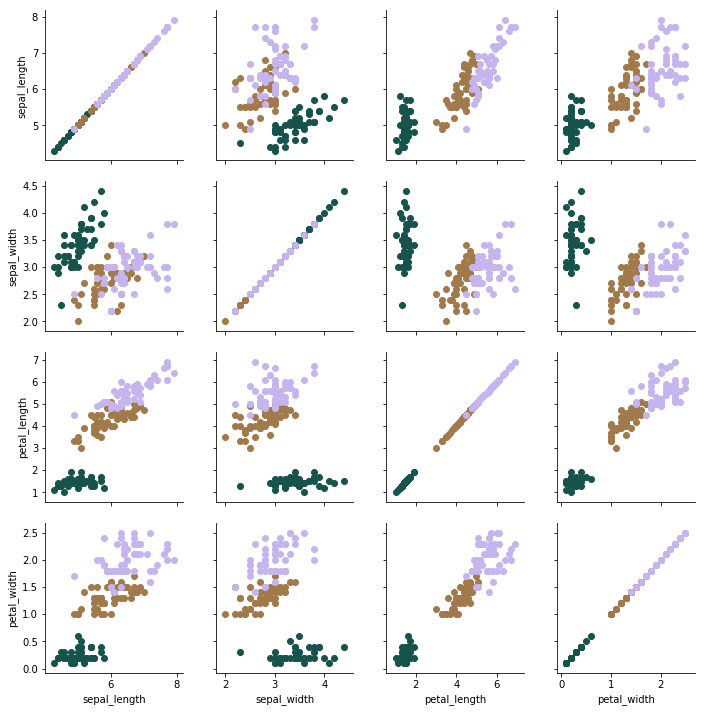

In [3]:
g = sns.PairGrid(iris, hue="species", palette=sns.color_palette("cubehelix", 3), vars=['sepal_length','sepal_width','petal_length','petal_width'])
g.map(plt.scatter)
plt.show()

Let us now try clustering these points using k-means clustering. First let us run the algorithm in a loop to determine the optimal number of clusters:

In [3]:
df = iris

In [4]:
from sklearn.preprocessing import LabelEncoder

In [5]:
le = LabelEncoder()

In [6]:
df['species'] = le.fit_transform(df['species'])

In [7]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [8]:
X = df.loc[:,df.columns!='species']

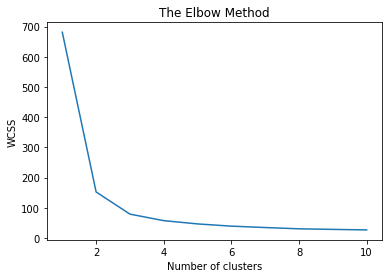

In [11]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

We see the elbow at k = 3; we also know that there happen to be three species of Iris in the data set. So, if we cluster the Iris datset using KMeans, how closely would the resulting clusters match the original labels?

In [19]:

kmeans_iris = KMeans(n_clusters=3)
pred_kmeans_iris = kmeans_iris.fit_predict(iris[['sepal_length','sepal_width','petal_length','petal_width']])

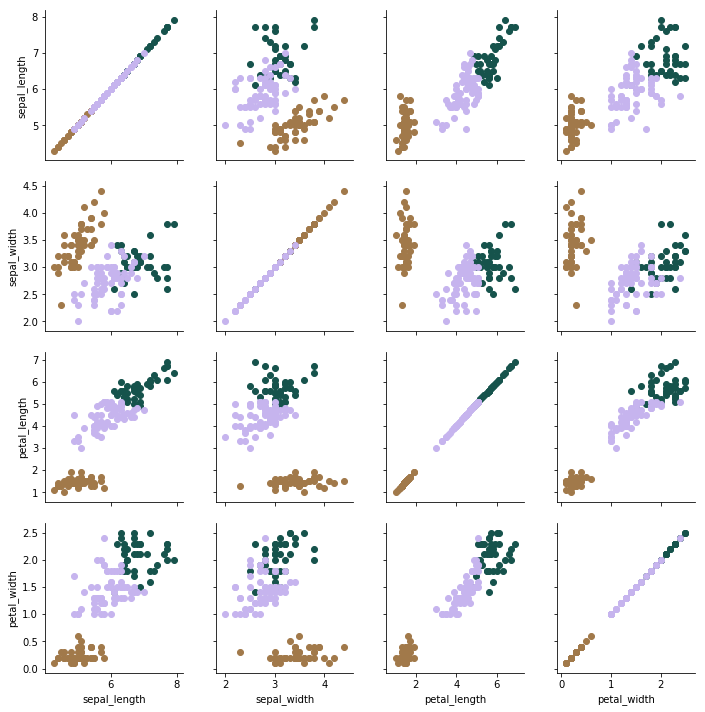

In [20]:
iris['kmeans_pred'] = pred_kmeans_iris

g = sns.PairGrid(iris, hue="kmeans_pred", palette=sns.color_palette("cubehelix", 3), vars=['sepal_length','sepal_width','petal_length','petal_width'])
g.map(plt.scatter)
plt.show()

How do these clusters match the original labels?

You can clearly see that visual inspection is no longer useful if we're working with multiple dimensions like this. So how can we evaluate the clustering result versus the original labels?

One way is to do a simple cross-tabulation:

In [21]:
pd.crosstab(iris['species'],iris['kmeans_pred'])

kmeans_pred,0,1,2
species,,,
0,0,50,0
1,2,0,48
2,36,0,14


We can use also an external cluster validation index such as the <a href = "http://scikit-learn.org/stable/modules/generated/sklearn.metrics.adjusted_rand_score.html">adjusted Rand score</a> which generates a score between -1 and 1 (where an exact match will be scored as 1).

In [22]:
from sklearn.metrics import adjusted_rand_score
iris_kmeans_score = adjusted_rand_score(iris['species'], iris['kmeans_pred'])
iris_kmeans_score

0.7302382722834697

What if we cluster using a Gaussian Mixture models? Would it earn a better ARI score?

Let us look at thge GMM algorithm a little closely, and compare performance of the two algorithms on a generated data set

In [23]:
from sklearn.mixture import GaussianMixture

In [24]:
gmm_iris = GaussianMixture(n_components=3).fit(iris[['sepal_length','sepal_width','petal_length','petal_width']])
pred_gmm_iris = gmm_iris.predict(iris[['sepal_length','sepal_width','petal_length','petal_width']])
iris['gmm_pred'] = pred_gmm_iris

In [25]:
iris_gmm_score = adjusted_rand_score(iris['species'], iris['gmm_pred'])
iris_gmm_score

0.9038742317748124

Thanks to ARI socres, we have a clear indicator which clustering result better matches the original dataset.